## Compare diffusivity tensors

Here we compare some properties of the diffusivity tensors from the ZA and TWA. 

In [1]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
from xgcm import Grid

In [2]:
diff_tensor_ZA = xr.open_dataset('analysis_data_files/diff_tensor_ZA_50km.nc')
diff_tensor_TWA = xr.open_dataset('analysis_data_files/diff_tensor_TWA_50km_av800.nc')

In [3]:
zeta_bar = xr.open_dataset('analysis_data_files/zeta_bar_800.nc')
#coarsen to the coarse resolution we are using 
zeta_bar_coarse = zeta_bar.zeta.coarsen(XC=10, YC=10).mean()

In [4]:
Tcenter = np.linspace(0,8, 101)
dT = Tcenter[1] - Tcenter[0]
Touter = np.append(Tcenter - dT/2, Tcenter[-1] + dT/2)

In [5]:
diff_tensor_TWA = diff_tensor_TWA.assign_coords({'Tc': Touter})

grid_iso = Grid(diff_tensor_TWA, coords = {'T':{'center':'T','outer':'Tc'}},
               periodic='X')

In [6]:
Zcenter = diff_tensor_ZA.Z.sel(Z=slice(-200, -3000)) 
# we don't interpolate in the top few 100m because zeta_coarse can have overturns there

In [7]:
# convert from T to zeta_bar for TWA averaged variables 

diff_tensor_TWA_zeta = xr.Dataset()

for var_name in diff_tensor_TWA.keys(): 
    print(var_name)
    diff_tensor_TWA_zeta[var_name] = grid_iso.transform(diff_tensor_TWA[var_name], 'T', Zcenter,
                                      target_data=zeta_bar_coarse, method='linear')

Kfast
Kslow
Kcorr
STcorr


/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountere

ATcorr
eigvalsSTcorr
eigvecsSTcorr


/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)


(array([1.800e+01, 5.300e+01, 5.315e+03, 9.671e+03, 9.276e+03, 6.205e+03,
        4.593e+03, 3.671e+03, 2.459e+03, 1.706e+03, 1.037e+03, 7.850e+02,
        4.760e+02, 3.650e+02, 2.820e+02, 1.370e+02, 8.800e+01, 5.800e+01,
        3.900e+01, 3.200e+01, 2.200e+01, 2.000e+01, 1.400e+01, 1.000e+01,
        4.000e+00, 7.000e+00, 3.000e+00, 5.000e+00, 1.000e+00]),
 array([-5000.        , -3103.44827586, -1206.89655172,   689.65517241,
         2586.20689655,  4482.75862069,  6379.31034483,  8275.86206897,
        10172.4137931 , 12068.96551724, 13965.51724138, 15862.06896552,
        17758.62068966, 19655.17241379, 21551.72413793, 23448.27586207,
        25344.82758621, 27241.37931034, 29137.93103448, 31034.48275862,
        32931.03448276, 34827.5862069 , 36724.13793103, 38620.68965517,
        40517.24137931, 42413.79310345, 44310.34482759, 46206.89655172,
        48103.44827586, 50000.        ]),
 <BarContainer object of 29 artists>)

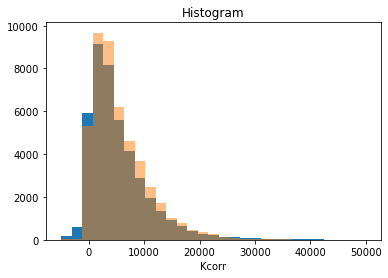

In [8]:
diff_tensor_TWA_zeta.Kcorr.sel(i=0,j=0).plot(bins=np.linspace(-5e3, 5e4,30))
diff_tensor_ZA.Kcorr.sel(i=0,j=0).sel(Z=slice(-200,-3000)).plot(
    bins=np.linspace(-5e3, 5e4,30), alpha=0.5)

(array([9.5000e+01, 3.6200e+02, 7.0660e+03, 1.8173e+04, 9.7390e+03,
        4.6980e+03, 2.1840e+03, 1.1340e+03, 7.8500e+02, 5.8100e+02,
        4.4600e+02, 2.6500e+02, 1.9300e+02, 1.1600e+02, 1.0400e+02,
        7.4000e+01, 5.5000e+01, 4.0000e+01, 2.8000e+01, 2.6000e+01,
        2.3000e+01, 1.6000e+01, 1.8000e+01, 1.0000e+01, 1.1000e+01,
        6.0000e+00, 5.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([-5000.        , -3103.44827586, -1206.89655172,   689.65517241,
         2586.20689655,  4482.75862069,  6379.31034483,  8275.86206897,
        10172.4137931 , 12068.96551724, 13965.51724138, 15862.06896552,
        17758.62068966, 19655.17241379, 21551.72413793, 23448.27586207,
        25344.82758621, 27241.37931034, 29137.93103448, 31034.48275862,
        32931.03448276, 34827.5862069 , 36724.13793103, 38620.68965517,
        40517.24137931, 42413.79310345, 44310.34482759, 46206.89655172,
        48103.44827586, 50000.        ]),
 <BarContainer object of 29 artists>)

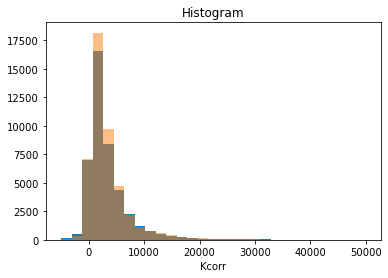

In [14]:
diff_tensor_TWA_zeta.Kcorr.sel(i=1,j=1).plot(bins=np.linspace(-5e3, 5e4,30))
diff_tensor_ZA.Kcorr.sel(i=1,j=1).sel(Z=slice(-200,-3000)).plot(
    bins=np.linspace(-5e3, 5e4,30), alpha=0.5)

(array([1.2540e+03, 4.3260e+03, 2.4841e+04, 8.3100e+03, 3.2300e+03,
        1.3800e+03, 4.4600e+02, 2.2000e+02, 1.4000e+02, 1.2000e+02,
        1.0300e+02, 8.3000e+01, 3.2000e+01, 2.5000e+01, 1.7000e+01,
        2.6000e+01, 9.0000e+00, 6.0000e+00, 7.0000e+00, 1.0000e+01,
        3.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([-5000.        , -3103.44827586, -1206.89655172,   689.65517241,
         2586.20689655,  4482.75862069,  6379.31034483,  8275.86206897,
        10172.4137931 , 12068.96551724, 13965.51724138, 15862.06896552,
        17758.62068966, 19655.17241379, 21551.72413793, 23448.27586207,
        25344.82758621, 27241.37931034, 29137.93103448, 31034.48275862,
        32931.03448276, 34827.5862069 , 36724.13793103, 38620.68965517,
        40517.24137931, 42413.79310345, 44310.34482759, 46206.89655172,
        48103.44827586, 50000.        ]),
 <BarContainer object of 29 artists>)

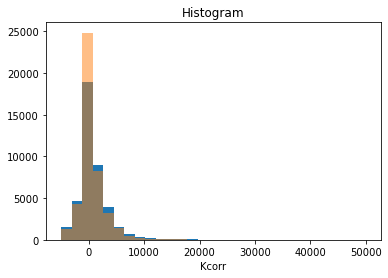

In [15]:
diff_tensor_TWA_zeta.Kcorr.sel(i=0,j=1).plot(bins=np.linspace(-5e3, 5e4,30))
diff_tensor_ZA.Kcorr.sel(i=0,j=1).sel(Z=slice(-200,-3000)).plot(
    bins=np.linspace(-5e3, 5e4,30), alpha=0.5)

(array([2.4160e+03, 6.9510e+03, 2.6878e+04, 5.4710e+03, 1.0900e+03,
        5.8000e+02, 4.1500e+02, 2.4000e+02, 1.2900e+02, 9.1000e+01,
        5.0000e+01, 3.2000e+01, 1.7000e+01, 5.0000e+00, 4.0000e+00,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([-5000.        , -3103.44827586, -1206.89655172,   689.65517241,
         2586.20689655,  4482.75862069,  6379.31034483,  8275.86206897,
        10172.4137931 , 12068.96551724, 13965.51724138, 15862.06896552,
        17758.62068966, 19655.17241379, 21551.72413793, 23448.27586207,
        25344.82758621, 27241.37931034, 29137.93103448, 31034.48275862,
        32931.03448276, 34827.5862069 , 36724.13793103, 38620.68965517,
        40517.24137931, 42413.79310345, 44310.34482759, 46206.89655172,
        48103.44827586, 50000.        ]),
 <BarContainer object of 29 artists>)

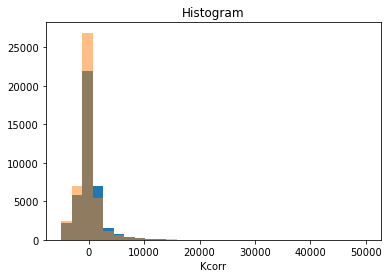

In [16]:
diff_tensor_TWA_zeta.Kcorr.sel(i=1,j=0).plot(bins=np.linspace(-5e3, 5e4,30))
diff_tensor_ZA.Kcorr.sel(i=1,j=0).sel(Z=slice(-200,-3000)).plot(
    bins=np.linspace(-5e3, 5e4,30), alpha=0.5)

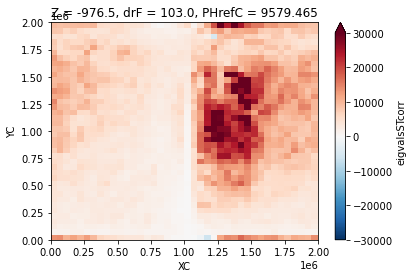

In [14]:
diff_tensor_ZA.eigvalsSTcorr.isel(ii=2).sel(Z=-1000, method='nearest').plot(vmin=-30e3)

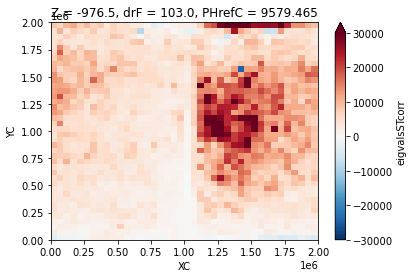

In [15]:
diff_tensor_TWA_zeta.eigvalsSTcorr.isel(ii=1).sel(Z=-1000, method='nearest').plot(vmin=-30e3)

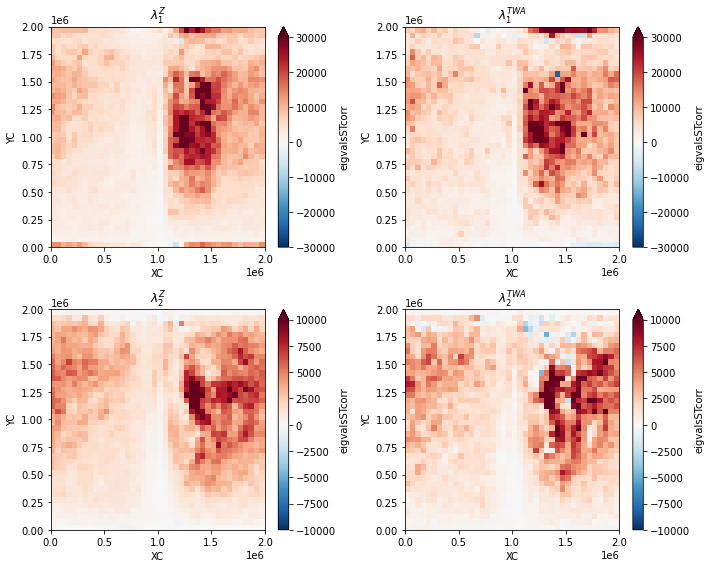

In [24]:
plt.figure(figsize=(10, 8))

plt.subplot(221)
diff_tensor_ZA.eigvalsSTcorr.isel(ii=2).sel(Z=-1000, method='nearest').plot(vmin=-30e3)
plt.title('$\lambda_1 ^Z$')

plt.subplot(222)
diff_tensor_TWA_zeta.eigvalsSTcorr.isel(ii=1).sel(Z=-1000, method='nearest').plot(vmin=-30e3)
plt.title('$\lambda_1 ^{TWA}$')

plt.subplot(223)
diff_tensor_ZA.eigvalsSTcorr.isel(ii=1).sel(Z=-1000, method='nearest').plot(vmin=-10e3)
plt.title('$\lambda_2 ^Z$')

plt.subplot(224)
diff_tensor_TWA_zeta.eigvalsSTcorr.isel(ii=0).sel(Z=-1000, method='nearest').plot(vmin=-10e3)
plt.title('$\lambda_2 ^{TWA}$')

plt.tight_layout()

In [ ]:
diff_tensor_TWA_zeta.Kcorr.sel(i=0,j=0).plot(bins=np.linspace(-5e3, 5e4,30))
diff_tensor_ZA.Kcorr.sel(i=0,j=0).sel(Z=slice(-200,-3000)).plot(
    bins=np.linspace(-5e3, 5e4,30), alpha=0.5)